In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [6]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    N = data.shape[0]
    
    k_indices = np.random.choice(np.arange(N),k)
    return data[k_indices]

initialize_clusters(np.arange(12).reshape((4,3)),2)


array([[ 9, 10, 11],
       [ 0,  1,  2]])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [50]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    # ***************************************************
    
    matrix = data[:,np.newaxis,:] - mu # the newaxis will allow broadcasting it to the number of clusters 
                                       # result is a matrix N  x k x D where (i,j) = X_i - mu_j
    return np.sqrt(np.sum(matrix,axis=2)**2)

a = np.arange(12).reshape(4,3)
b = np.array([[11,11,11],[12,12,12]])
build_distance_matrix(a,b)

array([[30., 33.],
       [21., 24.],
       [12., 15.],
       [ 3.,  6.]])

#### Update k-means parameters

In [79]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    # ***************************************************
    dst =  build_distance_matrix(data,mu_old)
    Z = np.argmin(dst,axis=1)
    losses = np.min(dst,axis=1)
    mu = np.zeros_like(mu_old)
    for k in range (mu.shape[0]):
        mu[k,:] = data[Z == k].mean(axis=0) 
    
    # NEW VALUES
    dst =  build_distance_matrix(data,mu)
    Z = np.argmin(dst,axis=1)
    losses = np.min(dst,axis=1)
    return losses,Z,mu

a = np.arange(12).reshape(4,3)
b = np.array([[1,2,3],[7,8,9]])
update_kmeans_parameters(a,b)


(array([3., 6., 3., 6.]), array([0, 0, 1, 1], dtype=int64), array([[1, 2, 3],
        [7, 8, 9]]))

#### Play with k-means

mu=[[ 3.04293407 64.12637363]
 [ 4.38736667 84.58888889]]
mu_old=[[ 3.95 76.  ]
 [ 3.6  85.  ]]
The current iteration of k-means is: 0,                the average loss is 7.195858999497235.


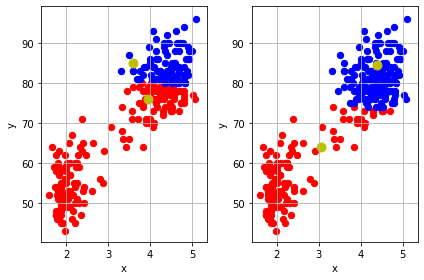

mu=[[ 2.41981148 57.76229508]
 [ 4.3564     81.58      ]]
mu_old=[[ 3.04293407 64.12637363]
 [ 4.38736667 84.58888889]]
The current iteration of k-means is: 1,                the average loss is 5.1083126808100285.


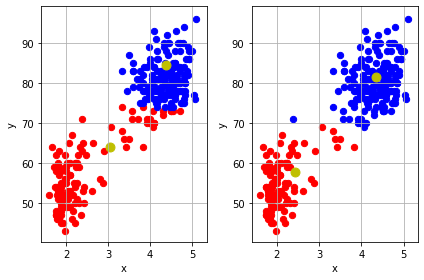

mu=[[ 2.1160098  55.01960784]
 [ 4.31084706 80.42352941]]
mu_old=[[ 2.41981148 57.76229508]
 [ 4.3564     81.58      ]]
The current iteration of k-means is: 2,                the average loss is 4.7586072231833905.


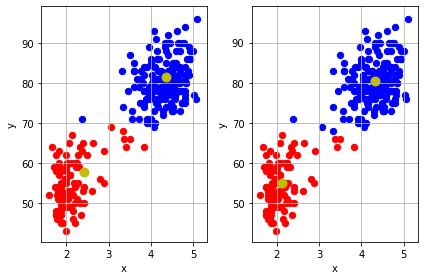

mu=[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
mu_old=[[ 2.1160098  55.01960784]
 [ 4.31084706 80.42352941]]
The current iteration of k-means is: 3,                the average loss is 4.7489401624487.


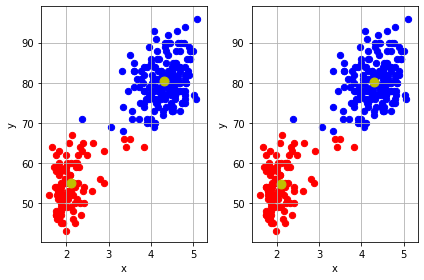

mu=[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
mu_old=[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
The current iteration of k-means is: 4,                the average loss is 4.7489401624487.


In [82]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        print(f"mu={mu}")
        print(f"mu_old={mu_old}")
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [66]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [88]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: make pixel values of each color (which is a matrix) 
    # into a vector. **don't normalize!**
    # ***************************************************
    processed_image = original_image.reshape((-1,3))
    return processed_image

processed_image = preprocess_image(original_image)
print(original_image.mean(axis=0).mean(axis=0))


[0.53683877 0.50339836 0.44167164]


mu=[[0.6449118  0.50670385 0.40736258]
 [0.39780363 0.40285677 0.3081038 ]
 [0.58275974 0.42583075 0.308774  ]
 [0.26772276 0.26688564 0.20814447]
 [0.63988763 0.700133   0.6954115 ]]
mu_old=[[0.9529412  0.29411766 0.2627451 ]
 [0.3019608  0.35686275 0.41960785]
 [0.88235295 0.2901961  0.15294118]
 [0.28235295 0.37254903 0.28627452]
 [0.6901961  0.61960787 0.60784316]]
The current iteration of k-means is: 0,                the average loss is 0.10867062211036682.


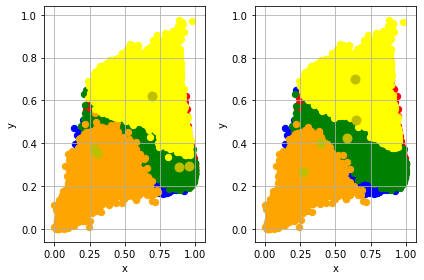

mu=[[0.64488673 0.5306054  0.4321602 ]
 [0.38525    0.3918093  0.29938626]
 [0.59531945 0.4270686  0.310065  ]
 [0.2494756  0.2450952  0.19273482]
 [0.63852096 0.71645075 0.7278974 ]]
mu_old=[[0.6449118  0.50670385 0.40736258]
 [0.39780363 0.40285677 0.3081038 ]
 [0.58275974 0.42583075 0.308774  ]
 [0.26772276 0.26688564 0.20814447]
 [0.63988763 0.700133   0.6954115 ]]
The current iteration of k-means is: 1,                the average loss is 0.10249506682157516.


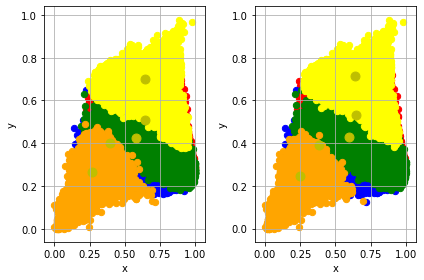

mu=[[0.64554375 0.54917926 0.45116377]
 [0.3754708  0.38307023 0.29250717]
 [0.59844476 0.4309289  0.31547472]
 [0.2390529  0.23249562 0.18409543]
 [0.63690317 0.7242655  0.7470702 ]]
mu_old=[[0.64488673 0.5306054  0.4321602 ]
 [0.38525    0.3918093  0.29938626]
 [0.59531945 0.4270686  0.310065  ]
 [0.2494756  0.2450952  0.19273482]
 [0.63852096 0.71645075 0.7278974 ]]
The current iteration of k-means is: 2,                the average loss is 0.0997566282749176.


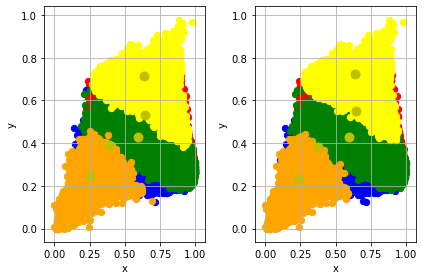

mu=[[0.64659894 0.5632367  0.46564928]
 [0.3694555  0.3774864  0.28784293]
 [0.59973216 0.43467408 0.32062218]
 [0.23297556 0.22512113 0.17944226]
 [0.6350788  0.7294365  0.76085323]]
mu_old=[[0.64554375 0.54917926 0.45116377]
 [0.3754708  0.38307023 0.29250717]
 [0.59844476 0.4309289  0.31547472]
 [0.2390529  0.23249562 0.18409543]
 [0.63690317 0.7242655  0.7470702 ]]
The current iteration of k-means is: 3,                the average loss is 0.09852907061576843.


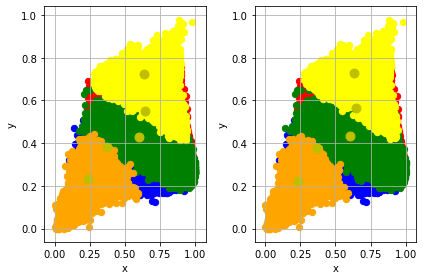

mu=[[0.6472719  0.573521   0.47621495]
 [0.36591217 0.37442532 0.2854876 ]
 [0.6010419  0.43732974 0.32451782]
 [0.2295889  0.22082631 0.17655678]
 [0.6338837  0.7329836  0.77092236]]
mu_old=[[0.64659894 0.5632367  0.46564928]
 [0.3694555  0.3774864  0.28784293]
 [0.59973216 0.43467408 0.32062218]
 [0.23297556 0.22512113 0.17944226]
 [0.6350788  0.7294365  0.76085323]]
The current iteration of k-means is: 4,                the average loss is 0.09802356362342834.


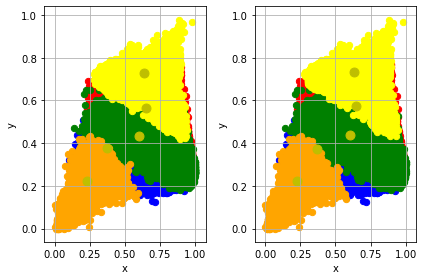

mu=[[0.6481071  0.5805352  0.48395553]
 [0.36423513 0.37266737 0.28407335]
 [0.60248953 0.43997136 0.3277792 ]
 [0.22699817 0.21771316 0.17460103]
 [0.6332223  0.73526853 0.7773691 ]]
mu_old=[[0.6472719  0.573521   0.47621495]
 [0.36591217 0.37442532 0.2854876 ]
 [0.6010419  0.43732974 0.32451782]
 [0.2295889  0.22082631 0.17655678]
 [0.6338837  0.7329836  0.77092236]]
The current iteration of k-means is: 5,                the average loss is 0.09783215820789337.


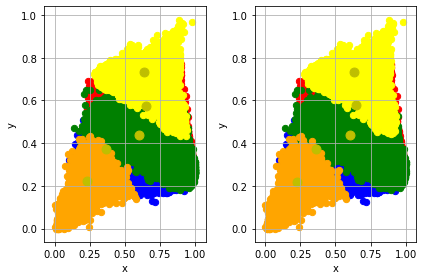

mu=[[0.6482887  0.58588195 0.4900425 ]
 [0.363702   0.3720652  0.2835771 ]
 [0.60376364 0.44182074 0.33007666]
 [0.22607367 0.21667185 0.17397429]
 [0.6328448  0.73694515 0.7820756 ]]
mu_old=[[0.6481071  0.5805352  0.48395553]
 [0.36423513 0.37266737 0.28407335]
 [0.60248953 0.43997136 0.3277792 ]
 [0.22699817 0.21771316 0.17460103]
 [0.6332223  0.73526853 0.7773691 ]]
The current iteration of k-means is: 6,                the average loss is 0.09772079437971115.


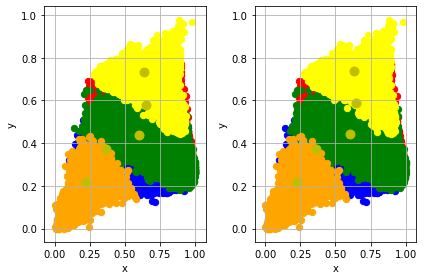

mu=[[0.6486863  0.590106   0.49492663]
 [0.3641791  0.37212926 0.2836629 ]
 [0.6057315  0.44329372 0.33183995]
 [0.22523502 0.21564472 0.17328703]
 [0.63237303 0.7385957  0.7867569 ]]
mu_old=[[0.6482887  0.58588195 0.4900425 ]
 [0.363702   0.3720652  0.2835771 ]
 [0.60376364 0.44182074 0.33007666]
 [0.22607367 0.21667185 0.17397429]
 [0.6328448  0.73694515 0.7820756 ]]
The current iteration of k-means is: 7,                the average loss is 0.09767860174179077.


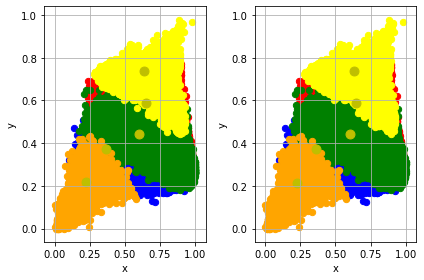

mu=[[0.6489135  0.59358543 0.49885657]
 [0.36501074 0.3728649  0.2842789 ]
 [0.6078619  0.44458988 0.33337432]
 [0.22523502 0.21564472 0.17328703]
 [0.6319794  0.7396942  0.78999376]]
mu_old=[[0.6486863  0.590106   0.49492663]
 [0.3641791  0.37212926 0.2836629 ]
 [0.6057315  0.44329372 0.33183995]
 [0.22523502 0.21564472 0.17328703]
 [0.63237303 0.7385957  0.7867569 ]]
The current iteration of k-means is: 8,                the average loss is 0.09763330966234207.


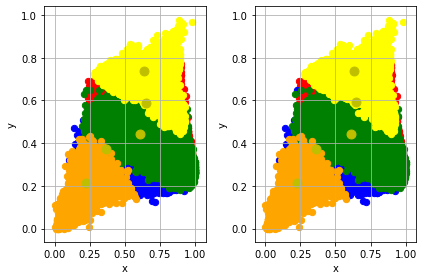

mu=[[0.6491444  0.59533376 0.50079286]
 [0.36602947 0.3736411  0.28490794]
 [0.60965943 0.44535545 0.33430782]
 [0.22523502 0.21564472 0.17328703]
 [0.6317396  0.7402788  0.79156554]]
mu_old=[[0.6489135  0.59358543 0.49885657]
 [0.36501074 0.3728649  0.2842789 ]
 [0.6078619  0.44458988 0.33337432]
 [0.22523502 0.21564472 0.17328703]
 [0.6319794  0.7396942  0.78999376]]
The current iteration of k-means is: 9,                the average loss is 0.09760446846485138.


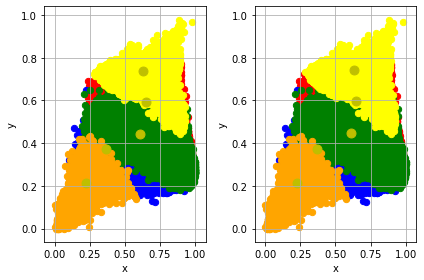

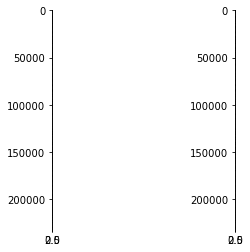

<Figure size 432x288 with 0 Axes>

In [99]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    data = processed_image
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []
    output_figure = "compression_figures/"

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        print(f"mu={mu}")
        print(f"mu_old={mu_old}")
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 10
threshold = 1e-6

# use kmeans to compress image
kmean_compression(processed_image, processed_image, k, max_iter, threshold)

In [98]:
a = np.array([1,2,3])


array([1, 1, 1])